# networkx

In [1]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [2]:
# !pip3 install networkx matplotlib
# !pip3 install pydot

In [3]:
from abcli import fullname
from abcli import string
from abcli import file
from abcli.modules import objects
from notebooks_and_scripts import NAME, VERSION
from notebooks_and_scripts.logger import logger
from notebooks_and_scripts.aws_batch.traffic import load_pattern, list_of_patterns

logger.info(f"{NAME}-{VERSION}-{fullname()}, built on {string.pretty_date()}")

botocore.credentials Found credentials in environment variables.
📜  notebooks & scripts-4.285.1-abcli-8.121.1, built on 27 April 2024, 16:59:20


---

In [4]:
object_name = f"traffic-{string.timestamp()}"
object_path = objects.object_path(object_name)

In [5]:
logger.info("{} pattern(s): {}".format(
    len(list_of_patterns()),
    ",".join(list_of_patterns()),
))

📜  1 pattern(s): a-bc-d


In [6]:
pattern = "a-bc-d"

📜  loaded a MultiDiGraph[4 node(s) X 4 edge(s)] from /Users/kamangir/git/notebooks-and-scripts/notebooks_and_scripts/aws_batch/a-bc-d.dot.


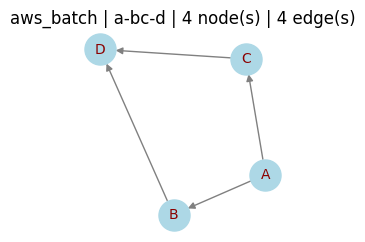

:: figure -> /Users/kamangir/storage/abcli/traffic-2024-04-27-16-59-20-50978/a-bc-d.png


In [7]:
success, graph = load_pattern(
    pattern=pattern,
    export_as_image=os.path.join(object_path,f"{pattern}.png"))
assert success

---

In [8]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli upload - $object_name

📜 awesome-bash-cli: .env: 22 env var(s)
📜 awesome-bash-cli: abcli/config.env: 13 env var(s)
🔋 gpu: not found.
🚀 abcli-8.121.1.current
confirmed: traffic-2024-04-27-16-59-20-50978 does not exist.
traffic-2024-04-27-16-59-20-50978 open upload started.
upload: ../../../../storage/abcli/traffic-2024-04-27-16-59-20-50978/a-bc-d.png to s3://kamangir/bolt/traffic-2024-04-27-16-59-20-50978/a-bc-d.png


:: traffic-2024-04-27-16-59-20-50978 += #open.


In [9]:
# END